In [1]:
%matplotlib notebook

The proposed origami mechanism in this article is a frog's hind leg. The following code will calculate the jacobian matrix of the mechanism where q0 is the input and the red x is the output point. 

The output point is selected as it is the centre of pressure of the face that is on the ground.

In [2]:
import numpy as np
import math
import scipy.optimize as opti
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import idealab_tools.matplotlib_tools


In [3]:
cut = np.array([[0,0,0],[6,0,0],[6,2,0],[0,2,0]])
val_fold = np.array([[2,1,0],[4,1,0],[0,1,0],[3,0,0],[3,2,0],[6,1,0]])
mnt_fold = np.array([[2,1,0],[4,1,0],[1,0,0],[1,2,0]])

<img src = "img3.jpg">

<IPython.core.display.Javascript object>


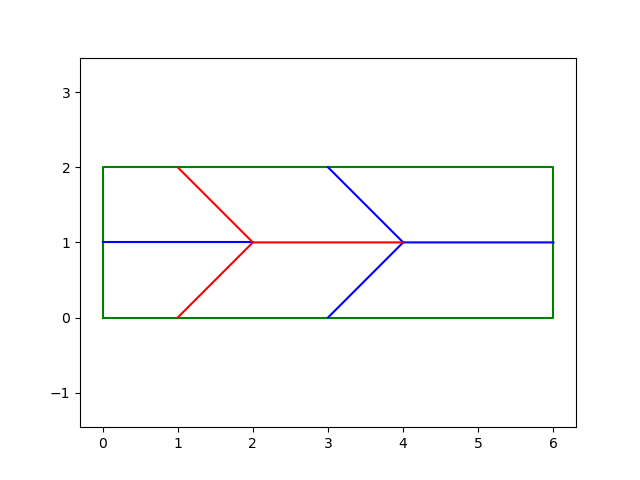

(-0.30000000000000004,
 6.2999999999999998,
 -0.10000000000000001,
 2.1000000000000001)

In [4]:
plt.plot(cut[(0,1,2,3,0),0],cut[(0,1,2,3,0),1],'g-')

plt.plot(val_fold[(5,1,4),0],val_fold[(5,1,4),1],'b-')
plt.plot(val_fold[(2,0),0],val_fold[(2,0),1],'b-')
plt.plot(val_fold[(3,1),0],val_fold[(3,1),1],'b-')

plt.plot(mnt_fold[(2,0,1),0],mnt_fold[(2,0,1),1],'r-')
plt.plot(mnt_fold[(3,0),0],mnt_fold[(3,0),1],'r-')
plt.axis('equal')

In [5]:
p0 = np.array([2,1,0])
p1 = np.array([1,0,0])
p2 = np.array([0,1,0])
p3 = np.array([1,2,0])
p4 = np.array([4,1,0])
p5 = np.array([3,0,0])
p6 = np.array([3,2,0])
p7 = np.array([6,1,0])

In [6]:
def length(v):
    length_squared = v.dot(v)
    length = length_squared**(.5)
    return length

In [7]:
def inner_angle(v1,v2):
    costheta = v1.dot(v2)/(length(v1)*length(v2))
    theta = math.acos(costheta)
    return theta

In [8]:
def total_angle(v1,v2,v3):
    costheta = np.dot(v1,v2)
    sintheta  = np.cross(v1,v2)
    l_sintheta = length(sintheta)
    neg = sintheta.dot(v3)
    if neg<0:
        neg = -1
    else:
        neg=1
    theta = math.atan2(neg*l_sintheta,costheta)
    return theta

In [9]:
def gen_function(q0):
    def Frog_leg(variables):
        x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7 = variables
        p0 = np.array([x0,y0,z0])
        p1 = np.array([x1,y1,z1])
        p2 = np.array([x2,y2,z2])
        p3 = np.array([x3,y3,z3])
        p4 = np.array([x4,y4,z4])
        p5 = np.array([x5,y5,z5])
        p6 = np.array([x6,y6,z6])
        p7 = np.array([x7,y7,z7])

        v1 = p1-p0
        v2 = p2-p0
        v3 = p3-p0
        v4 = p4-p0
        v5 = p5-p4
        v6 = p6-p4
        v7 = p7-p4

        x_axis = np.array([1,0,0])
        y_axis = np.array([0,1,0])
        z_axis = np.array([0,0,1])

        l1 = length(v1)
        l2 = length(v2)
        l3 = length(v3)
        l4 = length(v4)
        l5 = length(v5)
        l6= length(v6)
        l7= length(v7)

        n1 = np.cross(v2,v1)
        n2 = np.cross(v3,v2)
        n3 = np.cross(v5,v7)
        n4 = np.cross(v7,v6)
        n5 = np.cross(v5,-v4)
        n6 = np.cross(-v4,v6)
        
        error = []
        error.append([l3-1.4142135623730951])
        error.append([l4-2])
        error.append([l5-1.4142135623730951])
        error.append([l6-1.4142135623730951])
        error.append([l7-2])
        
        error.append([inner_angle(v3,v2)-0.7853981633974483])
        error.append([inner_angle(v4,v3)-2.356194490192345])
        error.append([inner_angle(v1,v4)-2.356194490192345])
        error.append([inner_angle(v6,v2)-0.7853981633974483])
        error.append([inner_angle(v5,v7)-2.356194490192345])
        error.append([inner_angle(v7,v6)-2.356194490192345])
        
        error.append([inner_angle(v2,-v7)])
       

        error.append([x0-2])
        error.append([y0-1])
        error.append([z0])
        
        error.append([x1-1])
        error.append([y1])
        error.append([z1])
        error.append([x2])
        error.append([y2-1])
        error.append([z2])
        

        error.append([total_angle(n1,n2,-v2)-q0*math.pi/180])
        error.append([total_angle(n1,n2,-v2)-total_angle(n3,n4,v7)])
        error.append([total_angle(n1,n2,-v2)-total_angle(n5,n6,-v4)])
        

        error1 = np.array(error)
        error1 = error1.flatten()
        

        return length(error1)
    return Frog_leg


In [10]:
test1 = 1.99999998e+00,   9.99999448e-01,  -2.91877739e-08, 1.00000143e+00,  -4.49042507e-07,   1.22350710e-07, 6.15861444e-07,   9.99998891e-01,   3.30836780e-07, 9.99999030e-01,   9.99999213e-01,   1.00000123e+00, 2.66666488e+00,   2.33333297e+00,  -1.33333602e+00,  1.66666587e+00,   1.33333093e+00,  -1.33251745e+00, 1.66666496e+00,   2.33414910e+00,  -3.33334746e-01, 4.66666485e+00,   2.33333648e+00,  -1.33333641e+00
sper1 = gen_function(90)
result = opti.minimize(sper1,test1)
result.fun

1.3147169347256018e-06

# Initial Orientation

The mechanism was selected to start from q0 = 30 degree. The lower threshold was set to incorporate the spring mechanism within the fold.

<IPython.core.display.Javascript object>


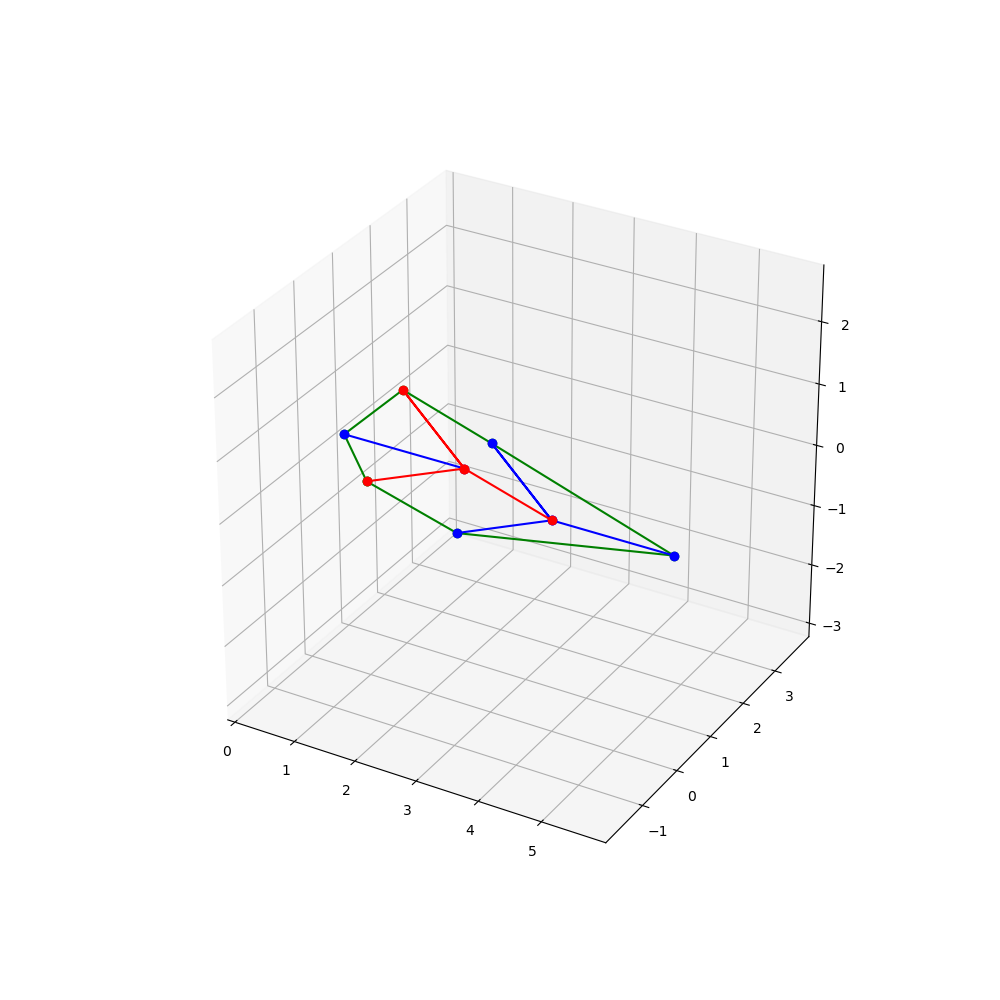

In [11]:
points_ini = result.x
points_ini = points_ini.reshape((8,3))
fig_ini = plt.figure(figsize=(10,10))
ax_ini = fig_ini.add_subplot(111, projection='3d')

ax_ini.plot3D(points_ini[(1,2,3,6,7,5,1),0],points_ini[(1,2,3,6,7,5,1),1],points_ini[(1,2,3,6,7,5,1),2],'go-')


ax_ini.plot3D(points_ini[(5,4,6,4,7),0],points_ini[(5,4,6,4,7),1],points_ini[(5,4,6,4,7),2],'bo-')
ax_ini.plot3D(points_ini[(0,2),0],points_ini[(0,2),1],points_ini[(0,2),2],'bo-')
ax_ini.plot3D(points_ini[(1,0,3,0,4),0],points_ini[(1,0,3,0,4),1],points_ini[(1,0,3,0,4),2],'ro-')
idealab_tools.matplotlib_tools.equal_axes(ax_ini,points_ini)

# Mechanism motion path
The loop below plots the mechanism as q0 changes from 30 to 90. This range will be changed after initial prototype testing. The range represents the period of the gait cycle the frog pushes the ground. 

In [12]:
ini = 1.99999998e+00,   9.99999448e-01,  -2.91877739e-08, 1.00000143e+00,  -4.49042507e-07,   1.22350710e-07, 6.15861444e-07,   9.99998891e-01,   3.30836780e-07, 9.99999030e-01,   9.99999213e-01,   1.00000123e+00, 2.66666488e+00,   2.33333297e+00,  -1.33333602e+00,  1.66666587e+00,   1.33333093e+00,  -1.33251745e+00, 1.66666496e+00,   2.33414910e+00,  -3.33334746e-01, 4.66666485e+00,   2.33333648e+00,  -1.33333641e+00

all_q = np.r_[90:20:15j]
path = []
q_in = []

for q1 in all_q:
    function = gen_function(q1)
    result  = opti.minimize(function,ini)
    points = result.x
    points =points.reshape((8,3))

    if result.fun<1e-3:
        path.append(points)
        q_in.append(q1)
        ini = result.x
    
    print(result.fun)


1.3147169347256018e-06
3.611802374056162e-06
3.758578583433128e-06
3.54308340713092e-06
2.8228832120274123e-06
5.205042567919843e-06
5.4184149881507035e-06
5.848650025374632e-06
6.895136749246612e-06
4.249538861809418e-06
7.90308770977323e-06
5.874331575309885e-06
5.245073634383943e-06
4.983156962378212e-06
5.027006686217094e-06


In [13]:
path = np.array(path)
q_in = np.array(q_in)


<IPython.core.display.Javascript object>


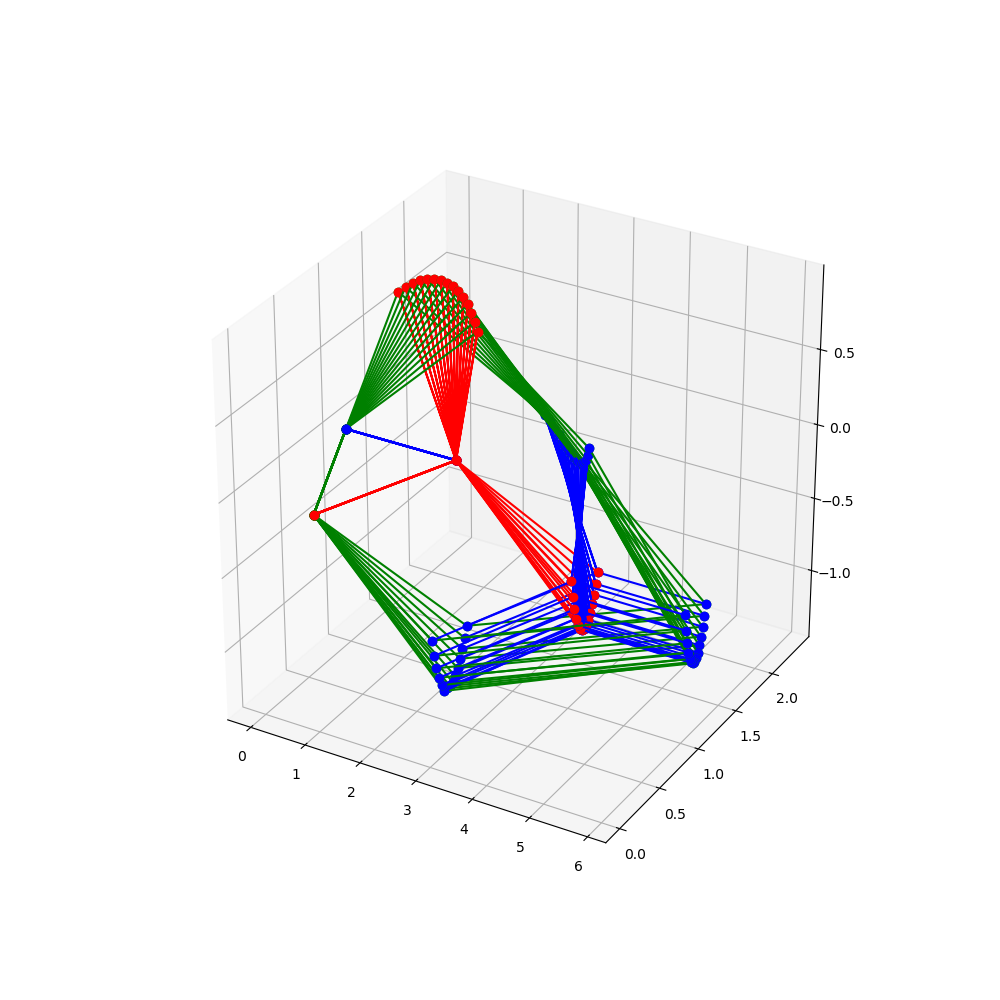

In [14]:
f = plt.figure(figsize=(10,10))
a = f.add_subplot(111, projection='3d')
for item in path:
    a.plot3D(item[(1,2,3,6,7,5,1),0],item[(1,2,3,6,7,5,1),1],item[(1,2,3,6,7,5,1),2],'go-')
    a.plot3D(item[(5,4,6,4,7),0],item[(5,4,6,4,7),1],item[(5,4,6,4,7),2],'bo-')
    a.plot3D(item[(0,2),0],item[(0,2),1],item[(0,2),2],'bo-')
    a.plot3D(item[(1,0,3,0,4),0],item[(1,0,3,0,4),1],item[(1,0,3,0,4),2],'ro-')
idealab_tools.matplotlib_tools.equal_axes(ax_ini,points)

# Output Trajectory
Below, the trajectory of the output point is plotted here....

In [15]:
pt7 = path[:,7,:]
pt5 = path[:,5,:]
midpt = (pt7 + pt5)/2
midpt

array([[ 3.16666617,  1.83333315, -1.33292626],
       [ 3.24645568,  1.75354445, -1.36847554],
       [ 3.3305042 ,  1.66949544, -1.39336853],
       [ 3.41844868,  1.58154908, -1.4087443 ],
       [ 3.50980658,  1.49019581, -1.41517709],
       [ 3.60393438,  1.39607904, -1.40933175],
       [ 3.7000102 ,  1.30000733, -1.38901989],
       [ 3.79704537,  1.20298143, -1.35486717],
       [ 3.89385418,  1.10620497, -1.30706917],
       [ 3.98905108,  1.01130761, -1.2523569 ],
       [ 4.08107064,  0.91902652, -1.16138604],
       [ 4.16828092,  0.8317595 , -1.05906666],
       [ 4.24885687,  0.75117466, -0.94353006],
       [ 4.32098467,  0.67904881, -0.81387039],
       [ 4.38289841,  0.61714774, -0.67140706]])

<IPython.core.display.Javascript object>


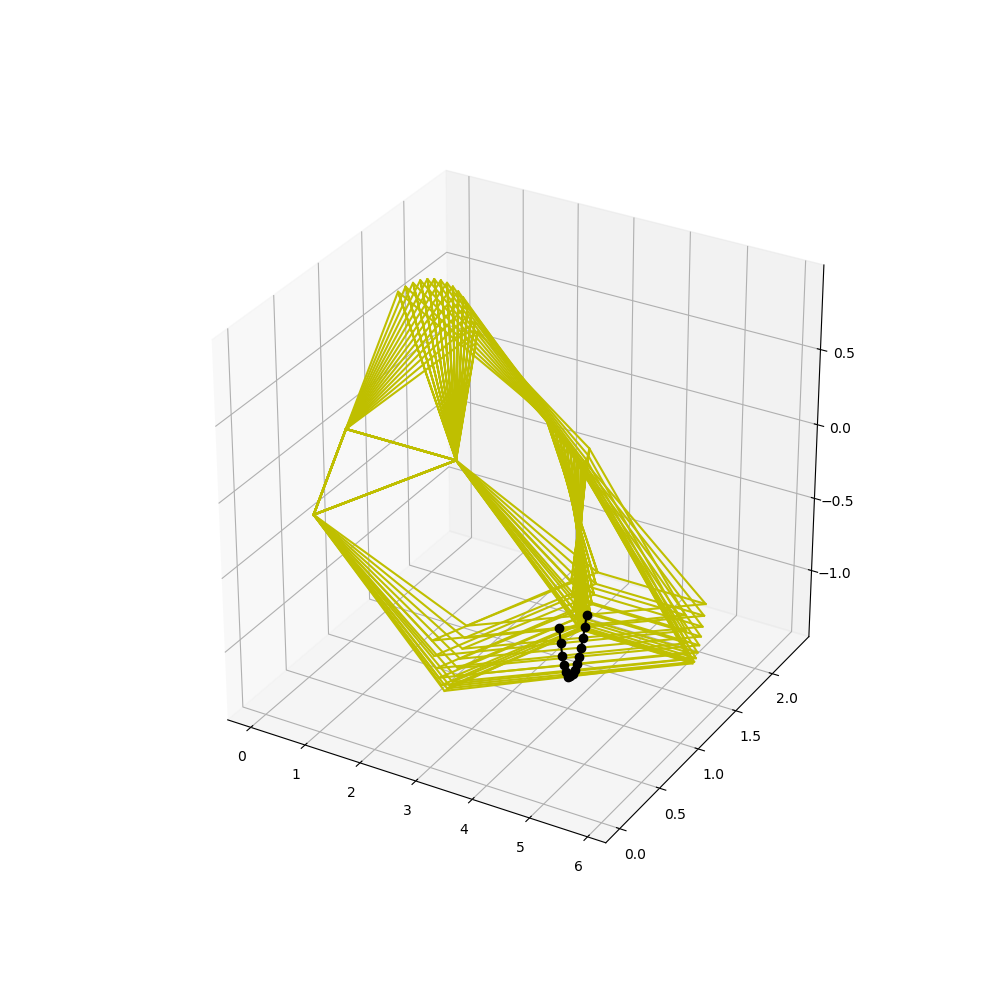

In [16]:
f = plt.figure(figsize=(10,10))
a = f.add_subplot(111, projection='3d')
for item in path:
    a.plot3D(item[(1,2,3,6,7,5,1),0],item[(1,2,3,6,7,5,1),1],item[(1,2,3,6,7,5,1),2],'y-')
    a.plot3D(item[(5,4,6,4,7),0],item[(5,4,6,4,7),1],item[(5,4,6,4,7),2],'y-')
    a.plot3D(item[(0,2),0],item[(0,2),1],item[(0,2),2],'y-')
    a.plot3D(item[(1,0,3,0,4),0],item[(1,0,3,0,4),1],item[(1,0,3,0,4),2],'y-')
a.plot3D(midpt[:,0],midpt[:,1],midpt[:,2],'ko-')
idealab_tools.matplotlib_tools.equal_axes(ax_ini,points)


# Force and Power calculation

In [17]:
q_in = np.r_[150:90:15j]
y_out = midpt
print(q_in)
print(y_out)

[ 150.          145.71428571  141.42857143  137.14285714  132.85714286
  128.57142857  124.28571429  120.          115.71428571  111.42857143
  107.14285714  102.85714286   98.57142857   94.28571429   90.        ]
[[ 3.16666617  1.83333315 -1.33292626]
 [ 3.24645568  1.75354445 -1.36847554]
 [ 3.3305042   1.66949544 -1.39336853]
 [ 3.41844868  1.58154908 -1.4087443 ]
 [ 3.50980658  1.49019581 -1.41517709]
 [ 3.60393438  1.39607904 -1.40933175]
 [ 3.7000102   1.30000733 -1.38901989]
 [ 3.79704537  1.20298143 -1.35486717]
 [ 3.89385418  1.10620497 -1.30706917]
 [ 3.98905108  1.01130761 -1.2523569 ]
 [ 4.08107064  0.91902652 -1.16138604]
 [ 4.16828092  0.8317595  -1.05906666]
 [ 4.24885687  0.75117466 -0.94353006]
 [ 4.32098467  0.67904881 -0.81387039]
 [ 4.38289841  0.61714774 -0.67140706]]


In [18]:
dy = y_out[2:,:]-y_out[:-2,:]
dy = dy*21.11/1000
dq = q_in[2:]-q_in[:-2]
print(dq)
print(dy)

[-8.57142857 -8.57142857 -8.57142857 -8.57142857 -8.57142857 -8.57142857
 -8.57142857 -8.57142857 -8.57142857 -8.57142857 -8.57142857 -8.57142857
 -8.57142857]
[[  3.45862076e-03  -3.45861409e-03  -1.27593641e-03]
 [  3.63077224e-03  -3.63082222e-03  -8.50073427e-04]
 [  3.78507335e-03  -3.78501527e-03  -4.60378778e-04]
 [  3.91560319e-03  -3.91527257e-03  -1.24011885e-05]
 [  4.01519829e-03  -4.01487885e-03   5.52178650e-04]
 [  4.07657302e-03  -4.07629057e-03   1.14974737e-03]
 [  4.09204638e-03  -4.09116771e-03   1.72997950e-03]
 [  4.05324048e-03  -4.04623442e-03   2.16399177e-03]
 [  3.95213963e-03  -3.95133706e-03   3.07537090e-03]
 [  3.78354204e-03  -3.79026057e-03   4.08035688e-03]
 [  3.54196725e-03  -3.54335291e-03   4.59893982e-03]
 [  3.22357612e-03  -3.22372257e-03   5.17609341e-03]
 [  2.82961687e-03  -2.82930809e-03   5.74451648e-03]]


In [19]:
J=(dy.T/dq.T)
J.shape

(3, 13)

In [20]:
m1 = 20e-3 # the single leg weighs approximately 17 g 
m2 = 100e-3 # the weight of the motor and the mechanism
M = m1 + m2 # combined weight of the assembly at one leg
g = 9.81 

fz = -20*M*g
fx = 20*M*g 
f = np.array([[fx,0,fz]]).T
t = J.T.dot(f)
t = t # Nm

print(t)
print(t.max())
print(t.min())

[[-0.01300488]
 [-0.01230799]
 [-0.01166141]
 [-0.01078944]
 [-0.00951222]
 [-0.0080394 ]
 [-0.00648813]
 [-0.00518939]
 [-0.00240831]
 [ 0.00081529]
 [ 0.00290329]
 [ 0.00536317]
 [ 0.00800665]]
0.00800664626927
-0.013004881634


According to the biomechanical reference, the frog takes about 0.18 second to propel. Let us assume that our mechanism should take 0.2 second to finish the output motion. This would mean that the input also must turn 60 degrees(decide earlier) within 0.2 second.

{ref: Sandra Nauwelaerts, Peter Aerts
Journal of Experimental Biology 2006 209: 66-77; doi: 10.1242/jeb.01969}

In [21]:
q_required = 0.2 # seconds/60 degree
q_required_SI = 60*math.pi/(180*0.2) #rad per second
q_required_SI

5.235987755982988

In [22]:
P_required = abs(t.min()*q_required_SI) # watts
P_required

0.068093401003660611

In [24]:
# Selected spring (rubber band) calculations
K = 122.6 # N/m
x = 34.21e-3 # m
P = 0.5* K * x*x/0.2 # watts
P

0.35870433664999984